<b>DESCRIPTION</b> - as provided by Kaggle

>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.

>Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.

</br>

><b>Currently, Quora uses a Random Forest model to identify duplicate questions.</b> In this competition, Kagglers are challenged to tackle this natural language processing problem by applying advanced techniques to classify whether question pairs are duplicates or not. Doing so will make it easier to find high quality answers to questions resulting in an improved experience for Quora writers, seekers, and readers.

<b>MOTIVATION</b>

>Inspired from a Kaggle Competition. Link to which is as follows: https://www.kaggle.com/c/quora-question-pairs

<b>PROBLEM STATEMENT</b>

>Given a pair of question on quora we wish to tell if these questions are similar or not.

<b>REAL WORLD OBJECTIVES and CONSTRAINTS</b>

>- Cost of a mis-classification can be very high.
>- We don't have a strict latency constraint.
>- Interpretaibility is also partially important.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('./Data/train.csv')
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
print('Total datapoints: ',len(data))
print('Total unique datapoints: ', len(data.drop_duplicates()))
print()
print('Columns in our data: ', data.columns)
print()
print('Some other information about the data: ', data.info())
print()
print('Value counts according to the class label:\n', data['is_duplicate'].value_counts())
print()
print('Unique number of questions: ',len(set(np.array(data['question1'].tolist() + data['question2'].tolist()))))
print('Unique number of question_ids: ',len(set(np.array(data['qid1'].tolist() + data['qid2'].tolist()))))


Total datapoints:  404290
Total unique datapoints:  404290

Columns in our data:  Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB
Some other information about the data:  None

Value counts according to the class label:
 0    255027
1    149263
Name: is_duplicate, dtype: int64

Unique number of questions:  537362
Unique number of question_ids:  537933


> Size of the entire data: 60 MB

> Number of datapoints: 404290
> - Data does not contain any duplicate entries.

> Columns in our data: ['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate']
> - Column 'is_duplicate' is the class-label.
> - Column 'question2' contain 2 null values as its entries.

> Out of 404290 unique datapoints, 255027 datapoints are non-similar, while 149263 datapoints are similar.

> Unique number of questions:  537362
> Unique number of question_ids:  537933

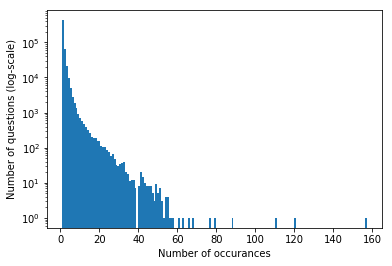

In [7]:
temp = np.unique(np.array(data['qid1'].tolist() + data['qid2'].tolist()),return_counts=True)
plt.hist(temp[1],bins = 160)
plt.yscale('log',nonposy='clip')
plt.xlabel('Number of occurances')
plt.ylabel('Number of questions (log-scale)')
plt.show()

In [14]:
data[data.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
